In [1]:
import sympy
import numpy as np
from einsteinpy.symbolic import MetricTensor

#import inflatox
import inflatox

In [2]:
sympy.init_printing()
φ, ψ = sympy.symbols("φ ψ")
V0, φ0, ψ0, m = sympy.symbols("V0 φ0 ψ0 m")
coords = [φ, ψ]
d = len(coords)

metric = [[0 for i in range(2)] for i in range(2)]
metric[0][0] = 1
metric[1][1] = φ**2
metric = MetricTensor(metric, (φ, ψ))
V = (V0 - sympy.sqrt(ψ0*ψ) + 1/2*(m**2)*((φ-φ0)**2)).nsimplify()
display(metric.tensor())
display(V)

⎡1  0 ⎤
⎢     ⎥
⎢    2⎥
⎣0  φ ⎦

In [3]:
hesse = inflatox.SymbolicCalculation.new(coords, metric, V).execute([[0,1]])

Calculating orthonormal basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculating covariant Hesse matrix...


<IPython.core.display.Math object>

Projecting the Hesse matrix on the vielbein basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
out = inflatox.Compiler(hesse, cleanup=False).compile()
out.print_sym_lookup_table()

[Symbol Dictionary]
φ -> x[0]
ψ -> x[1]
V0 -> args[0]
m -> args[1]
φ0 -> args[2]
ψ0 -> args[3]


In [5]:
lib = inflatox.consistency_conditions.InflationCondition(out)

In [12]:
p = np.array([1.0, 1.0, 1.0, 1.0])
x = np.zeros((10_000, 10_000))
start_stop = np.array([
  [-10.0, 10.0],
  [-10.0, 10.0]
])

inflatox.libinflx_rs.anguelova(
  lib.dylib,
  p,
  x,
  start_stop
)

In [16]:
print(x)
print(x[~np.isnan(x)])
print(x[np.where(x <= 1)])

[[           nan            nan            nan ... 2.91737246e+09
  2.91853459e+09 2.91969695e+09]
 [           nan            nan            nan ... 2.91589204e+09
  2.91705358e+09 2.91821535e+09]
 [           nan            nan            nan ... 2.91441228e+09
  2.91557323e+09 2.91673442e+09]
 ...
 [           nan            nan            nan ... 2.59570773e+08
  2.59672701e+08 2.59774649e+08]
 [           nan            nan            nan ... 2.59832569e+08
  2.59934600e+08 2.60036652e+08]
 [           nan            nan            nan ... 2.60094568e+08
  2.60196702e+08 2.60298856e+08]]
[2.79385378e+00 6.60179072e+00 1.20686539e+01 ... 2.60094568e+08
 2.60196702e+08 2.60298856e+08]
[0.99954003 0.99832229 0.99710549 ... 0.99668296 0.99806817 0.99945411]


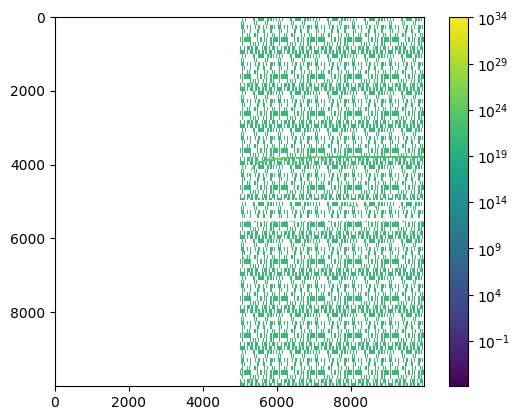

In [14]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
plt.imshow(x, norm=LogNorm())
plt.colorbar()